In [1]:
import AlexEigScattering2 as AES
import os,time, h5py
import numpy as np
import matplotlib.pyplot as plt
from common.baseclasses import ArrayWithAxes as AWA

basedir=os.path.dirname("./")
datadir="../sample_eigenbasis_data"
%matplotlib notebook


/home/basovlab/Projects/LRM/common/baseclasses.py:473: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  try: result=ndarray_operator(self,*args,**kwargs)
/home/basovlab/Projects/LRM/common/baseclasses.py:482: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  for axis_grid in axis_grids]
/home/basovlab/Projects/LRM/common/baseclasses.py:517: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)

<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "TaS2_eps_230K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "TaS2_eps_30K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Erik_BSTS_epsilon.pickle"...


In [2]:
def load_eigpairs(eigpair_fname):
    """Normalization by sum always ensures that integration will be like summing, which is
    much simpler than keeping track of dx, dy..."""

    global eigpairs
    eigpairs = dict()

    path=os.path.join(datadir,eigpair_fname)

    with h5py.File(path,'r') as f:
        for key in list(f.keys()):
            eigfunc=np.array(f.get(key))
            eigfunc/=np.sqrt(np.sum(np.abs(eigfunc)**2))
            eigpairs[float(key)] = AWA(eigfunc,\
                                       axes=[np.linspace(0,1,eigfunc.shape[0]),\
                                             np.linspace(0,1,eigfunc.shape[1])])


In [3]:
def TestScatteringBasisChange(q=44,\
                           E=44*np.exp(1j*2*np.pi*5e-2),\
                           N_sample_eigenbasis=100,\
                           N_tip_eigenbasis = 10):

    global Responder,Jmaker,R_alphabeta

    Responder=AES.SampleResponse(eigpairs,E=E,N=N_sample_eigenbasis)
    xs,ys=Responder.xs,Responder.ys
    Jmaker=AES.BesselGenerator(q,xs=xs,ys=ys,\
                               N_tip_eigenbasis=N_tip_eigenbasis)
    #betaz_alpha = np.eye(N_tip_eigenbasis);
    
    betaz_alpha = np.diag((2-.1j)*(2**(np.arange(N_tip_eigenbasis)+1)))
    Lambdaz_beta = (2**(2*(1+np.arange(N_tip_eigenbasis)))[::-1])

    Ps=np.zeros((len(xs),len(ys)))
    Rs=np.zeros((len(xs),len(ys)))
    last = 0
    for i,x0 in enumerate(xs):
        for j,y0 in enumerate(ys):
            start = time.time()
            tip_eigenbasis=Jmaker.GetTipEigenbasis(x0,y0)
            R_alphabeta = Responder.GetRAlphaBeta(tip_eigenbasis)
            Ps[i,j] = np.sum(np.linalg.inv(betaz_alpha-R_alphabeta).dot(Lambdaz_beta))
            Rs[i,j] = np.sum(np.diag(R_alphabeta))
            last = AES.Progress(i,len(xs),last)
    
    return {'P':Ps,'R':Rs}



In [4]:
load_eigpairs("UnitSquareMesh_100x100_1000_eigenbasis.h5")

Setting Energy
Use Eigvals Len: 100
Setting Sigma
Setting Kernel
Setting Scattering Matrix
Excitation vector (in basis of J(n), n in [0,2]):
	[4 3]


/home/basovlab/anaconda3/envs/fenicsproject/lib/python3.7/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
/home/basovlab/anaconda3/envs/fenicsproject/lib/python3.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


10% complete...
20% complete...
30% complete...
40% complete...
50% complete...
60% complete...
70% complete...
80% complete...
90% complete...
0.959479049841563


<IPython.core.display.Javascript object>


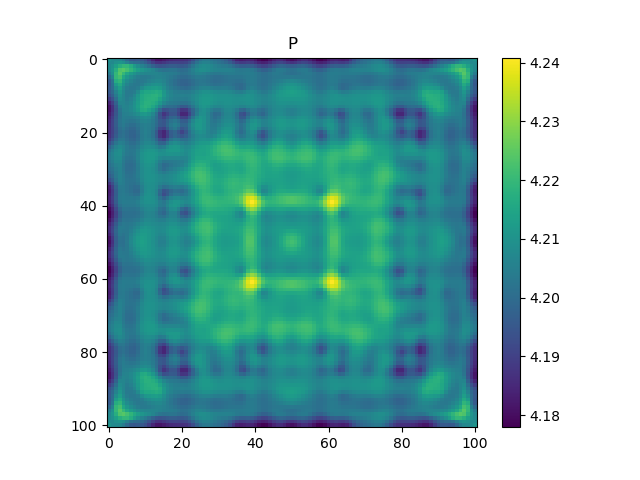

<IPython.core.display.Javascript object>


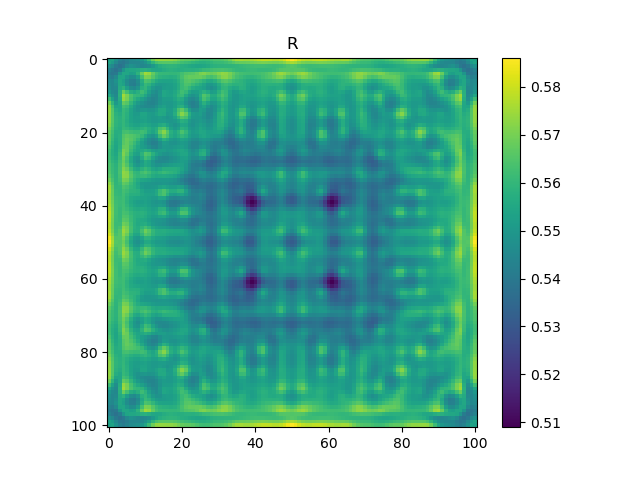

CPU times: user 43.6 s, sys: 8.32 s, total: 51.9 s
Wall time: 57.6 s


In [7]:
%%time
t1=time.time()
d=TestScatteringBasisChange(E=44*np.exp(1j*2*np.pi*5e-2),N_sample_eigenbasis=100,N_tip_eigenbasis=2)
print((time.time()-t1)/60)
plt.figure()
plt.imshow(np.abs(d['P'])); plt.title('P');plt.colorbar()
plt.figure()
plt.imshow(np.abs(d['R'])); plt.title('R');plt.colorbar()

Setting Energy
Use Eigvals Len: 100
Setting Sigma
Setting Kernel
Setting Scattering Matrix
Excitation vector (in basis of J(n), n in [0,1]):
	[0]


/home/basovlab/anaconda3/envs/fenicsproject/lib/python3.7/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
/home/basovlab/anaconda3/envs/fenicsproject/lib/python3.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


10% complete...
20% complete...
30% complete...
40% complete...
50% complete...
60% complete...
70% complete...
80% complete...
90% complete...
1.1373349944750468


<IPython.core.display.Javascript object>


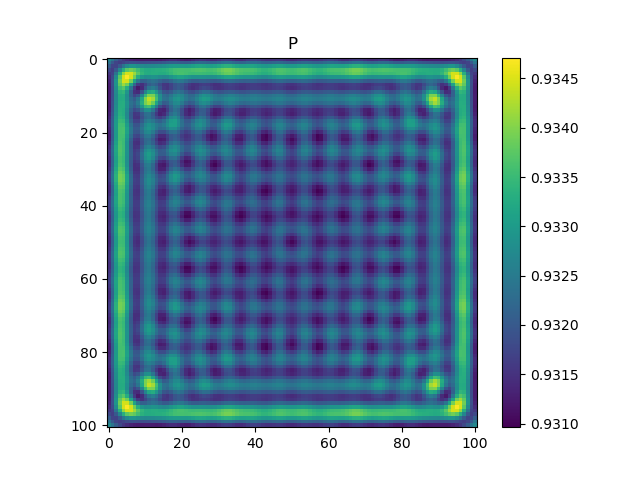

<IPython.core.display.Javascript object>


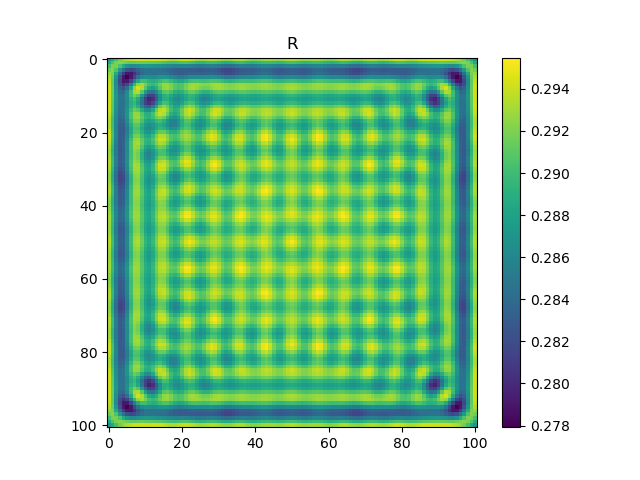

CPU times: user 1min 20s, sys: 1min 14s, total: 2min 35s
Wall time: 1min 8s


In [6]:
%%time
t1=time.time()
d=TestScatteringBasisChange(E=44*np.exp(1j*2*np.pi*5e-2),N_sample_eigenbasis=100,N_tip_eigenbasis=1)
print((time.time()-t1)/60)
plt.figure()
plt.imshow(np.abs(d['P'])); plt.title('P');plt.colorbar()
plt.figure()
plt.imshow(np.abs(d['R'])); plt.title('R');plt.colorbar()

Setting Energy
Use Eigvals Len: 100
Setting Sigma
Setting Kernel
Setting Scattering Matrix
Excitation vector (in basis of J(n), n in [0,5]):
	[0 3 3 1 4]
[[ 2.-0.1j  0.+0.j   0.+0.j   0.+0.j   0.+0.j ]
 [ 0.+0.j   4.-0.2j  0.+0.j   0.+0.j   0.+0.j ]
 [ 0.+0.j   0.+0.j   6.-0.3j  0.+0.j   0.+0.j ]
 [ 0.+0.j   0.+0.j   0.+0.j   8.-0.4j  0.+0.j ]
 [ 0.+0.j   0.+0.j   0.+0.j   0.+0.j  10.-0.5j]]
[5 4 3 2 1]


<IPython.core.display.Javascript object>


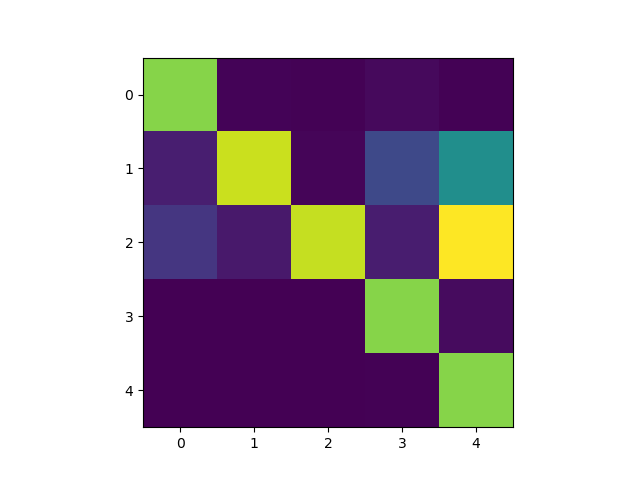

/home/basovlab/anaconda3/envs/fenicsproject/lib/python3.7/site-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
/home/basovlab/anaconda3/envs/fenicsproject/lib/python3.7/site-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


10% complete...
20% complete...
30% complete...
40% complete...
50% complete...
60% complete...
70% complete...
80% complete...
90% complete...
1.6353956739107767


<IPython.core.display.Javascript object>


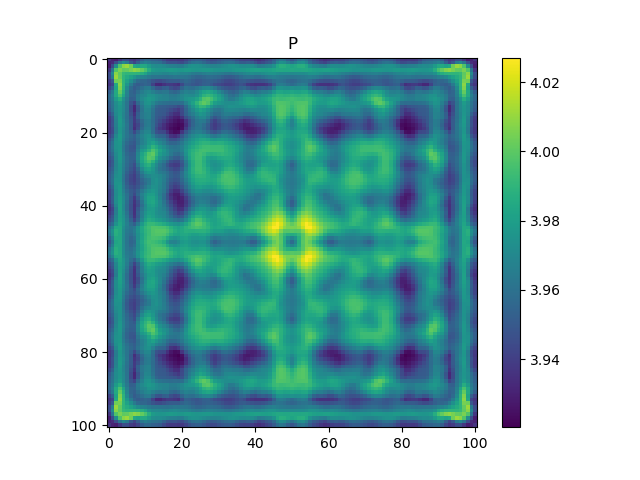

<IPython.core.display.Javascript object>


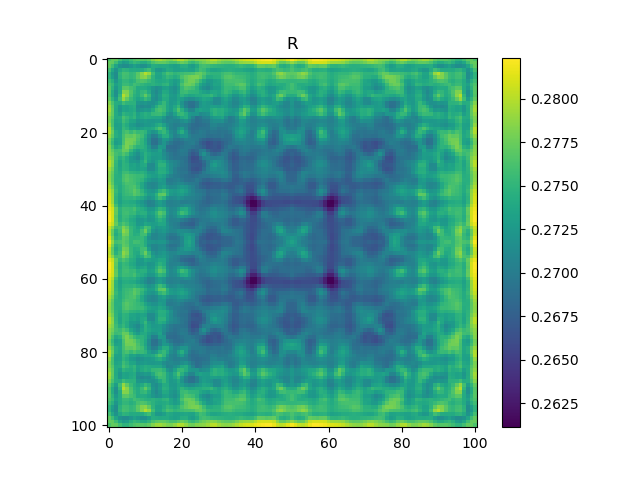

CPU times: user 5min 16s, sys: 4min 32s, total: 9min 48s
Wall time: 1min 38s


In [13]:
%%time
t1=time.time()
d=TestScatteringBasisChange(E=44*np.exp(1j*2*np.pi*5e-2),N_sample_eigenbasis=100,N_tip_eigenbasis=5)
print((time.time()-t1)/60)
plt.figure()
plt.imshow(np.abs(d['P']));.959479049841563 plt.title('P');plt.colorbar()
plt.figure()
plt.imshow(np.abs(d['R'])); plt.title('R');plt.colorbar()

In [ ]:
#take a look at the tip eigenfunctions we're using...
x0,y0=.5,.5
basis=Jmaker.GetTipEigenbasis(x0,y0)
plt.figure()
plt.imshow(np.sum(basis,axis=0));plt.colorbar()

for i in range(len(basis)):
    plt.figure()
    plt.imshow(basis[i])
    plt.colorbar()

In [ ]:
%%time
d=TestScatteringBasisChange(E=44*np.exp(1j*2*np.pi*5e-2),N_sample_eigenbasis=100,N_tip_eigenbasis=5)
plt.figure()
plt.imshow(np.abs(d['P'])); plt.title('P');plt.colorbar()
plt.figure()
plt.imshow(np.abs(d['R'])); plt.title('R');plt.colorbar()

In [ ]:
d=TestScatteringBasisChange(E=2000*np.exp(1j*2*np.pi*3e-2),N_sample_eigenbasis=100,N_tip_eigenbasis=1)
plt.figure()
plt.imshow(np.abs(d['P'])); plt.title('P');plt.colorbar()
plt.figure()
plt.imshow(np.abs(d['R'])); plt.title('R');plt.colorbar()

In [ ]:
%%time
d=TestScatteringBasisChange(E=2000*np.exp(1j*2*np.pi*3e-2),N_sample_eigenbasis=300,N_tip_eigenbasis=1)
plt.figure()
plt.imshow(np.abs(d['P'])); plt.title('P');plt.colorbar()
plt.figure()
plt.imshow(np.abs(d['R'])); plt.title('R');plt.colorbar()

In [ ]:
q=20
E=2000*np.exp(1j*2*np.pi*5e-2)
N=10
Responder=AES.SampleResponse(eigpairs,E=E,N=N)
xs,ys=Responder.xs,Responder.ys
Jmaker=AES.BesselGenerator(q,xs=xs,ys=ys)

In [ ]:
tip_eigenbasis=Jmaker.GetTipEigenbasis(x0=0,y0=0)
R_alphabeta = Responder.GetRAlphaBeta(tip_eigenbasis)
plt.matshow(abs(R_alphabeta)); colorbar()

In [ ]:
from common import numerics as num
qs=[]; eigvals=[]
for eigval,eigfunc in zip(Responder.use_eigvals,\
                          Responder.use_eigfuncs):
    s=num.Spectrum(num.Spectrum(eigfunc,axis=0),axis=1).folded
    fx,fy=s.locate(s.max())[0]
    q=2*pi*np.sqrt(fx**2+fy**2)
    qs.append(q); eigvals.append(eigval)

plt.figure()
plt.plot(qs,np.sqrt(eigvals),marker='o')
plt.figure();
eigfunc.plot()


In [ ]:
xs=Jmaker.xs2
print(xs.min(),xs.max())

In [ ]:
tip_eigenbasis=Jmaker.GetTipEigenbasis(x0=0.5,y0=0.5)
R_alphabeta = Responder.GetRAlphaBeta(tip_eigenbasis)
plt.matshow(abs(R_alphabeta)); colorbar()

In [ ]:
basis=Jmaker.GetTipEigenbasis(0,0)
print(basis[0].shape,Jmaker.shape)
plt.figure();plt.imshow(basis[0]);colorbar()
plt.figure();plt.imshow(basis[1])

In [ ]:
plt.figure()
plt.matshow(np.abs(Responder.V_nm));colorbar()
plt.figure()
plt.matshow(np.abs(Responder.D));colorbar()